<a href="https://colab.research.google.com/github/Jorgemontanez25/Regularized-Linear-Regression-Project-Tutorial/blob/main/Regularized_Linear_Regression_Project_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**US county-level sociodemographic and health resource data (2018-2019).**





In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dataframe = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')
print(dataframe.shape)
print(dataframe.info())
dataframe.head()

(3140, 108)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB
None


fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

EL dataset contiene una gran cantidad de elementos entre los que estan 3140 elementos y 108 variables de las cuales 106 son numericas y 2 son categoricas

*Drop duplicades*

In [3]:
dataframe = dataframe.drop_duplicates().reset_index(drop = True)
print(dataframe.shape)
dataframe.head()


(3140, 108)


fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0  1001    55601   6787               12.206615    7637   
1  1003   218022  24757               11.355276   26913   
2  1005    24881   2732               10.980266    2960   
3  1007    22400   2456               10.964286    2596   
4  1009    57840   7095               12.266598    7570   

   10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                 13.735364   6878                 12.370281   7089   
1                 12.344167  23579                 10.814964  25213   
2                 11.896628   3268                 13.134520   3201   
3                 11.589286   3029                 13.522321   3113   
4                 13.087828   6742                 11.656293   6884   

   30-39 y/o % of total pop  ...  COPD_number  diabetes_prevalence  \
0                 12.749771  ...         3644                 12.9   
1                 11.564429  ...        14692                 12.0   
2                 12.865239  ...         2373                 19.7   
3                 13.897321  ...         1789                 14.1   
4                 11.901798  ...         4661                 13.5   

   diabetes_Lower 95% CI  diabetes_Upper 95% CI  diabetes_number  \
0                   11.9                   13.8             5462   
1                   11.0                   13.1            20520   
2                   18.6                   20.6             3870   
3                   13.2                   14.9             2511   
4                   12.6                   14.5             6017   

   CKD_prevalence  CKD_Lower 95% CI  CKD_Upper 95% CI  CKD_number  \
0             3.1               2.9               3.3        1326   
1             3.2               3.0               3.5        5479   
2             4.5               4.2               4.8         887   
3             3.3               3.1               3.6         595   
4             3.4               3.2               3.7        1507   

   Urban_rural_code  
0                 3  
1                 4  
2                 6  
3                 2  
4                 2  

[5 rows x 108 columns]

El dataset no cuenta con valores duplicados .

In [4]:
object_columns = dataframe.select_dtypes(include=['object']).columns
object_columns


Index(['COUNTY_NAME', 'STATE_NAME'], dtype='object')

In [5]:
# Apply isnull function to the DataFrame
is_null_df = dataframe.isnull().count()

# Display the resulting DataFrame
print(is_null_df)

fips                      3140
TOT_POP                   3140
0-9                       3140
0-9 y/o % of total pop    3140
19-Oct                    3140
                          ... 
CKD_prevalence            3140
CKD_Lower 95% CI          3140
CKD_Upper 95% CI          3140
CKD_number                3140
Urban_rural_code          3140
Length: 108, dtype: int64


In [6]:
dataframe['Heart disease_number']

0        3345
1       13414
2        2159
3        1533
4        4101
        ...  
3135     1862
3136      981
3137     1034
3138      500
3139      471
Name: Heart disease_number, Length: 3140, dtype: int64

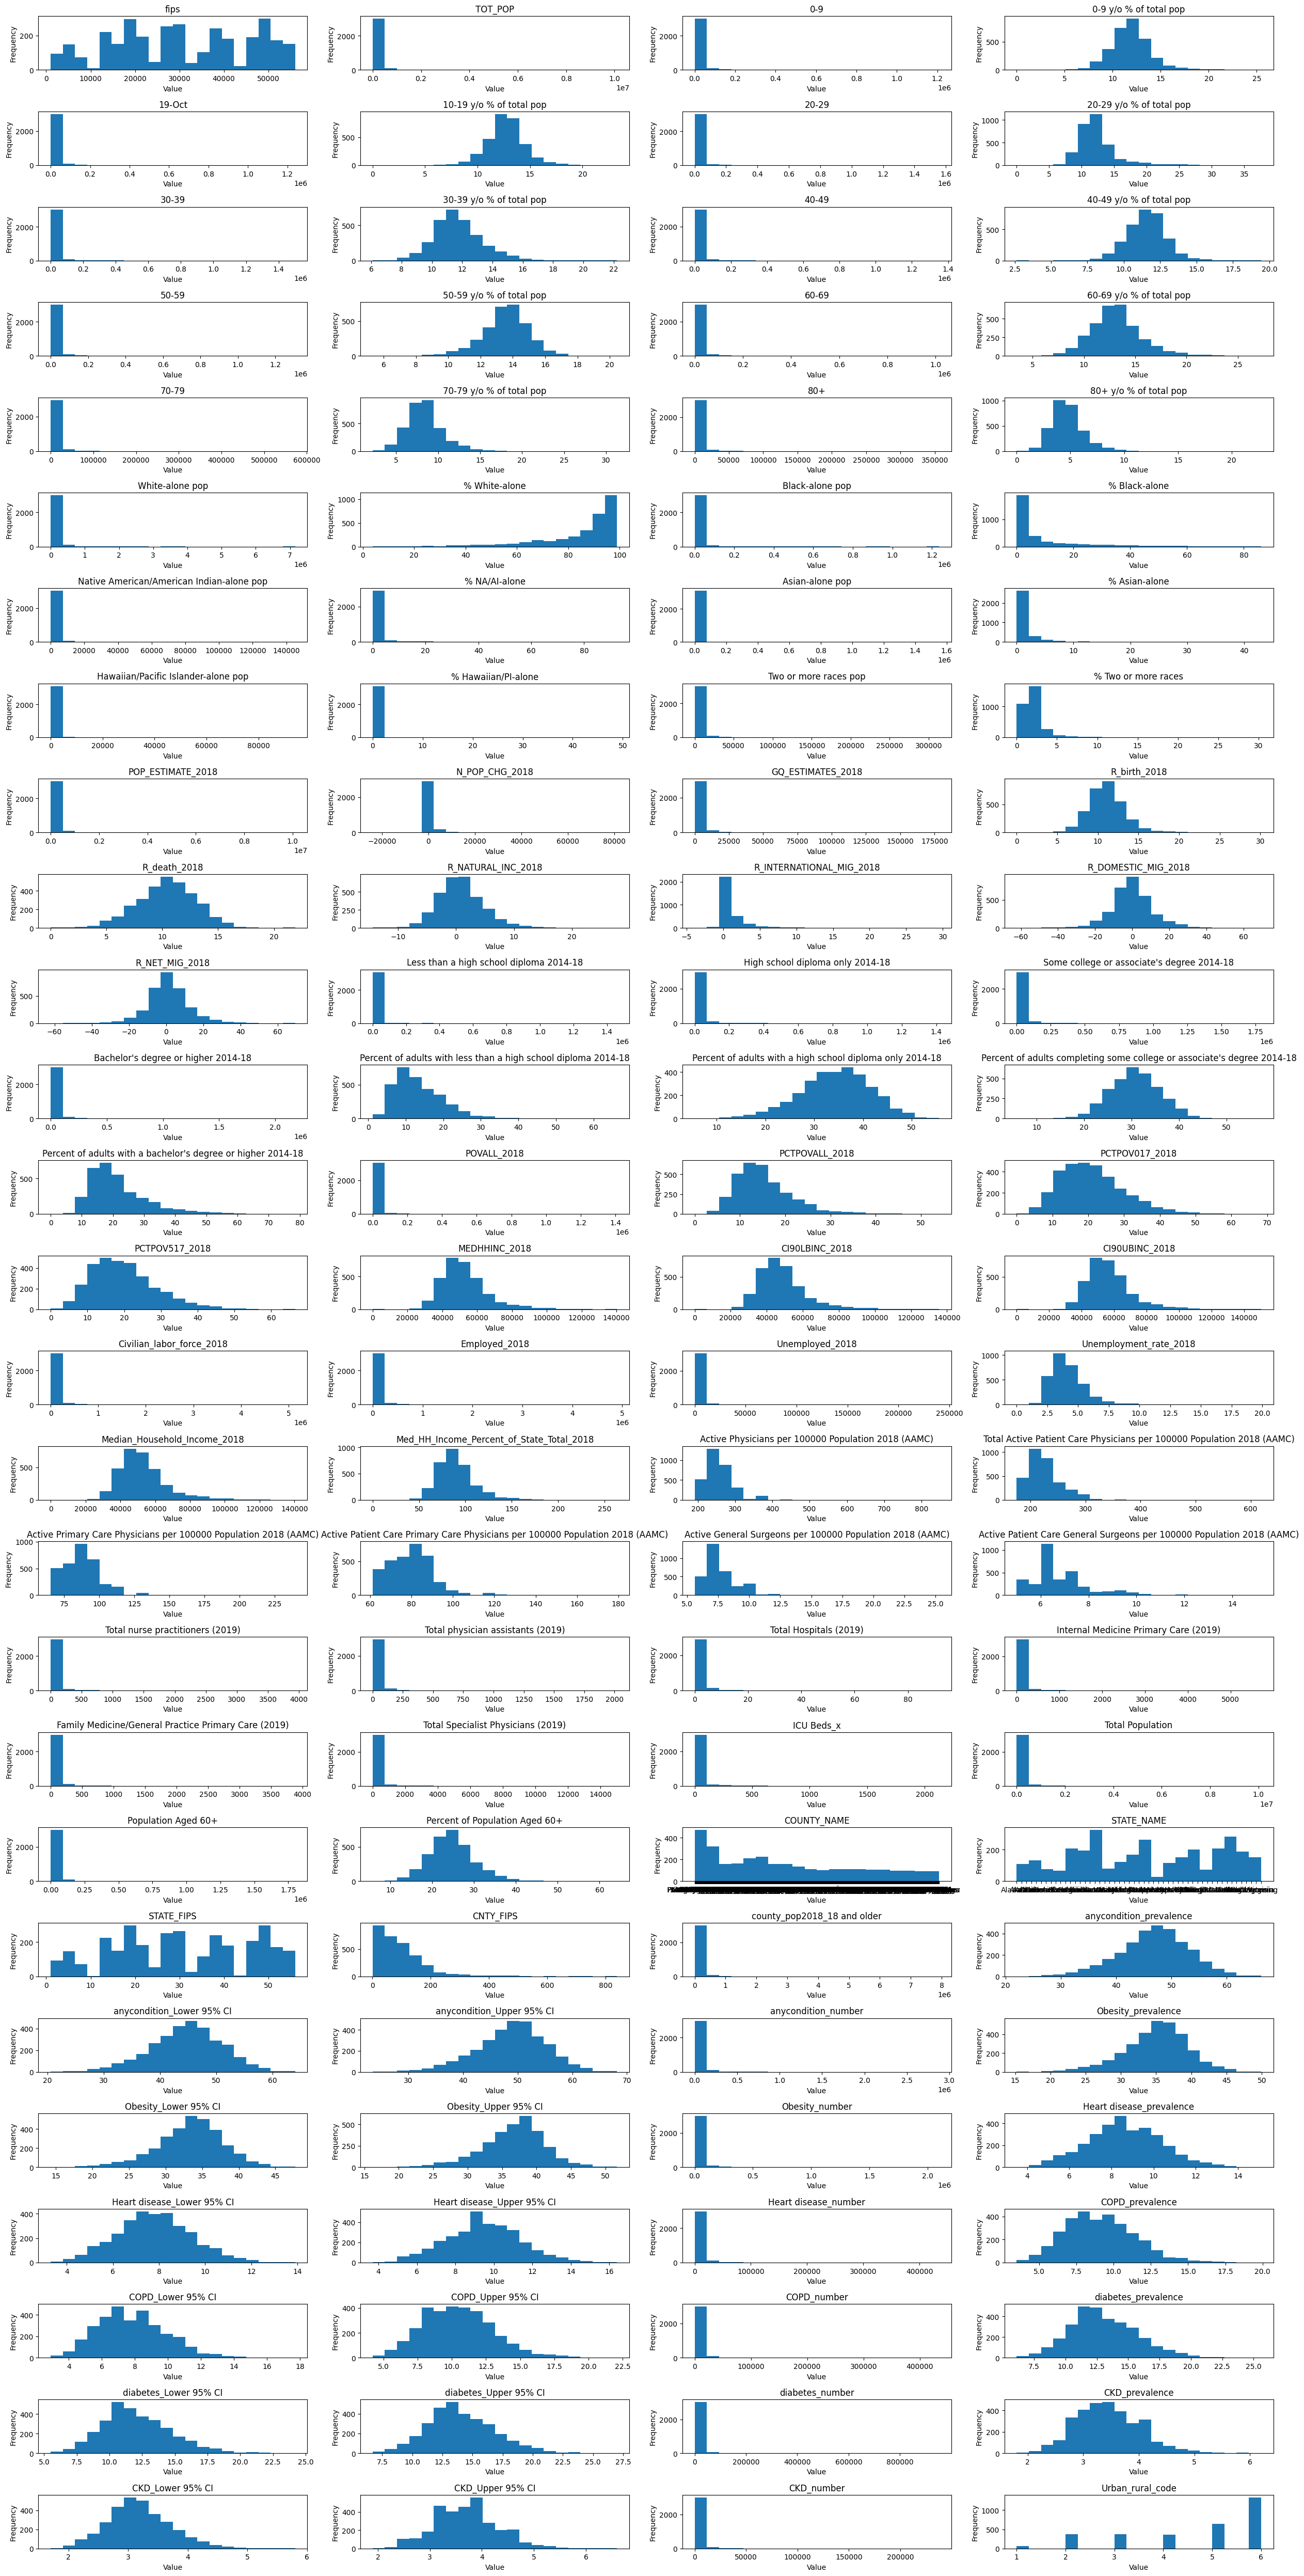

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Define subplot dimensions
nrows = 27
ncols = 4

# Create subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 50))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable in a separate subplot
for i, (col, ax) in enumerate(zip(dataframe.columns, axes)):
    ax.hist(dataframe[col], bins=20)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Buscamos relación entre recursos de salud y datos sociodemográficos. Y sociodemográfico en términos sencillos, analiza la vida que rodea a los individuos y características como edad, género, orientación sexual, raza, religión, ingresos, estado civil, tasa de natalidad, tasa de mortalidad, tamaño promedio de la familia, herencia, educación, historial médico. .

In [8]:
list(dataframe.columns)

['fips',
 'TOT_POP',
 '0-9',
 '0-9 y/o % of total pop',
 '19-Oct',
 '10-19 y/o % of total pop',
 '20-29',
 '20-29 y/o % of total pop',
 '30-39',
 '30-39 y/o % of total pop',
 '40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or 

Bajo la relacion que se busca por parte del problema, optare por quedarme con todas las variables a que la gran mayoria presenta datos socioeconomicos de las personas en el dataset y los datos restantes son representativos de la parte media; como variable dependiente que tomare sera  la de heart disease-prevalence, ya que entre los datos medicos se me hizo el mas relevante dado que tienes historiales medicos de obsidad y diabetes pueden ser indicadores o cauantes de problemas cardiacos.


In [13]:
# Importing the StandardScaler class from the sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler

# Obtaining data types of columns in the total_data DataFrame
data_types = dataframe.dtypes

# Filtering numeric columns excluding the "Heart disease_number" column
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

# Creating a StandardScaler object
scaler = StandardScaler()

# Scaling the numeric features in total_data and storing the result in norm_features
norm_features = scaler.fit_transform(dataframe[numeric_columns])

# Creating a new DataFrame with the scaled numeric variables
total_data_scal = pd.DataFrame(norm_features, index = dataframe.index, columns = numeric_columns)

# Adding the "Heart disease_number" column from total_data to total_data_scal
total_data_scal["Heart disease_number"] = dataframe["Heart disease_number"]

# Displaying the first few rows of the scaled DataFrame
total_data_scal.head()


fips   TOT_POP       0-9  0-9 y/o % of total pop    19-Oct  \
0 -1.940874 -0.145679 -0.142421                0.158006 -0.135556   
1 -1.940742  0.341296  0.287476               -0.242861  0.320383   
2 -1.940610 -0.237785 -0.239429               -0.419441 -0.246181   
3 -1.940478 -0.245223 -0.246032               -0.426966 -0.254791   
4 -1.940346 -0.138966 -0.135053                0.186249 -0.137140   

   10-19 y/o % of total pop     20-29  20-29 y/o % of total pop     30-39  \
0                  0.573496 -0.153144                  0.027610 -0.139384   
1                 -0.193107  0.183774                 -0.469965  0.230620   
2                 -0.439718 -0.225971                  0.272104 -0.218759   
3                 -0.609076 -0.230792                  0.396168 -0.220555   
4                  0.216679 -0.155888                 -0.200808 -0.143570   

   30-39 y/o % of total pop  ...  diabetes_prevalence  diabetes_Lower 95% CI  \
0                  0.588469  ...            -0.063696              -0.071720   
1                 -0.110300  ...            -0.394103              -0.414900   
2                  0.656538  ...             2.432709               2.483064   
3                  1.264959  ...             0.376846               0.423984   
4                  0.088582  ...             0.156575               0.195197   

   diabetes_Upper 95% CI  diabetes_number  CKD_prevalence  CKD_Lower 95% CI  \
0              -0.089834        -0.129902       -0.609615         -0.582796   
1              -0.337677         0.376251       -0.433549         -0.393279   
2               2.317776        -0.183415        1.855312          1.880929   
3               0.299632        -0.229096       -0.257483         -0.203761   
4               0.158008        -0.111247       -0.081417         -0.014244   

   CKD_Upper 95% CI  CKD_number  Urban_rural_code  Heart disease_number  
0         -0.669652   -0.147523         -1.082865                  3345  
1         -0.343373    0.389791         -0.420704                 13414  
2          1.777443   -0.204321          0.903618                  2159  
3         -0.180233   -0.242100         -1.745026                  1533  
4         -0.017093   -0.124105         -1.745026                  4101  

[5 rows x 106 columns]

In [14]:
plt.figure(figsize=(80, 75))
sns.heatmap(total_data_scal[total_data_scal.columns].corr(), annot=True, fmt='.2f')
plt.tight_layout()
plt.show()



Dado el numero de variables es dificil leer el mapa de calor, si nos basamos en los colores del mapa podemos observar que la gran mayoria de las cariables tienen relacion entre ellas.

In [15]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Split the data into features (X) and target variable (y)
X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Get the indices of the training and testing sets
train_indices = list(X_train.index)
test_indices = list(X_test.index)

# Select the top features using SelectKBest and f_regression
k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func=f_regression, k=k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

# Transform the datasets with selected features
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[ix])

# Display the first few rows of the transformed training dataset
X_train_sel.head()


TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0 -0.232556 -0.227731 -0.234284 -0.232951 -0.226353 -0.231316 -0.229599   
1 -0.158676 -0.178665 -0.180166 -0.188266 -0.175070 -0.161168 -0.134688   
2 -0.199114 -0.211128 -0.195138 -0.166782 -0.195036 -0.194045 -0.199725   
3 -0.036595 -0.037734 -0.017077 -0.057986 -0.052252 -0.033158 -0.020228   
4  0.090839  0.094680  0.101662  0.056721  0.042392  0.068095  0.101699   

      60-69     70-79       80+  ...  \
0 -0.233425 -0.234680 -0.234420  ...   
1 -0.105618 -0.119270 -0.091822  ...   
2 -0.219256 -0.222207 -0.205154  ...   
3 -0.032603 -0.023876 -0.046224  ...   
4  0.144664  0.140685  0.166099  ...   

   Family Medicine/General Practice Primary Care (2019)  \
0                                          -0.212643      
1                                          -0.116680      
2                                          -0.192263      
3                                           0.062458      
4                                           0.274818      

   Total Specialist Physicians (2019)  Total Population  Population Aged 60+  \
0                           -0.208590         -0.231195            -0.229737   
1                           -0.110850         -0.150293            -0.098866   
2                           -0.217668         -0.197005            -0.216056   
3                           -0.107888         -0.036940            -0.030034   
4                            0.194913          0.097767             0.161314   

   county_pop2018_18 and older  anycondition_number  Obesity_number  \
0                    -0.233171            -0.234370       -0.232975   
1                    -0.152859            -0.142645       -0.155304   
2                    -0.195125            -0.193205       -0.201976   
3                    -0.039882            -0.003321        0.006163   
4                     0.088485             0.165555        0.182740   

   COPD_number  diabetes_number  CKD_number  
0    -0.223516        -0.218609   -0.219329  
1    -0.110080        -0.131449   -0.130962  
2    -0.193106        -0.189197   -0.206391  
3    -0.007077        -0.047515   -0.045054  
4     0.265603         0.123040    0.132454  

[5 rows x 31 columns]

In [16]:
X_test_sel

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0   -0.285286 -0.285362 -0.294836 -0.269566 -0.258568 -0.268541 -0.289649   
1    0.496553  0.433072  0.392170  0.544659  0.453677  0.391480  0.499744   
2   -0.260191 -0.255123 -0.265837 -0.246628 -0.234723 -0.240703 -0.264552   
3    0.039389  0.058341  0.059701 -0.018647  0.003236  0.030594  0.074401   
4    0.364272  0.281232  0.323623  0.525353  0.295990  0.288317  0.298029   
..        ...       ...       ...       ...       ...       ...       ...   
623 -0.226952 -0.219406 -0.225840 -0.230853 -0.212838 -0.215832 -0.222200   
624 -0.295174 -0.290625 -0.300371 -0.279935 -0.271226 -0.282276 -0.298756   
625 -0.189552 -0.205100 -0.196226 -0.191434 -0.186972 -0.180149 -0.183407   
626 -0.019742 -0.015725 -0.002270 -0.019696 -0.053089 -0.036540 -0.013111   
627 -0.175542 -0.181536 -0.163206 -0.200128 -0.179480 -0.157119 -0.169337   

        60-69     70-79       80+  ...  \
0   -0.312989 -0.316763 -0.286734  ...   
1    0.668639  0.716353  0.476084  ...   
2   -0.289867 -0.289846 -0.290962  ...   
3    0.091003  0.060721  0.005012  ...   
4    0.461297  0.497760  0.351393  ...   
..        ...       ...       ...  ...   
623 -0.241248 -0.249174 -0.236658  ...   
624 -0.319421 -0.327363 -0.310528  ...   
625 -0.181676 -0.191001 -0.157152  ...   
626  0.004195 -0.003466 -0.014968  ...   
627 -0.172897 -0.164823 -0.163784  ...   

     Family Medicine/General Practice Primary Care (2019)  \
0                                            -0.303292      
1                                             0.853184      
2                                            -0.277451      
3                                             0.197267      
4                                             0.659217      
..                                                 ...      
623                                          -0.199435      
624                                          -0.312513      
625                                          -0.160127      
626                                          -0.064147      
627                                          -0.218328      

     Total Specialist Physicians (2019)  Total Population  \
0                             -0.285225         -0.284324   
1                              0.424904          0.477184   
2                             -0.261868         -0.257294   
3                              0.130719          0.036299   
4                              0.305024          0.336581   
..                                  ...               ...   
623                           -0.220435         -0.226648   
624                           -0.290449         -0.293772   
625                           -0.150490         -0.183217   
626                           -0.039921         -0.013217   
627                           -0.208912         -0.188589   

     Population Aged 60+  county_pop2018_18 and older  anycondition_number  \
0              -0.308211                    -0.283698            -0.302439   
1               0.620724                     0.517408             0.527360   
2              -0.287868                    -0.259943            -0.249299   
3               0.055281                     0.031494             0.035274   
4               0.423969                     0.390596             0.271127   
..                   ...                          ...                  ...   
623            -0.243989                    -0.228757            -0.247448   
624            -0.320346                    -0.294902            -0.316619   
625            -0.177617                    -0.185384            -0.178418   
626            -0.000553                    -0.019660             0.065233   
627            -0.181770                    -0.176718            -0.180735   

     Obesity_number  COPD_number  diabetes_number  CKD_number  
0         -0.302292    -0.324038        -0.276290   -0.281172  
1          0.516364     0.443806         0.41

In [17]:
# Add target variable 'Heart disease_number' to the selected training features
X_train_sel["Heart disease_number"] = y_train.values

# Add target variable 'Heart disease_number' to the selected testing features
X_test_sel["Heart disease_number"] = y_test.values

# Save the selected training features and target variable to a CSV file
X_train_sel.to_csv("clean_train.csv", index=False)

# Save the selected testing features and target variable to a CSV file
X_test_sel.to_csv("clean_test.csv", index=False)


**Linear Regression Model**

In [18]:
train_data = pd.read_csv("clean_train.csv")
test_data = pd.read_csv("clean_test.csv")

train_data.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0 -0.232556 -0.227731 -0.234284 -0.232951 -0.226353 -0.231316 -0.229599   
1 -0.158676 -0.178665 -0.180166 -0.188266 -0.175070 -0.161168 -0.134688   
2 -0.199114 -0.211128 -0.195138 -0.166782 -0.195036 -0.194045 -0.199725   
3 -0.036595 -0.037734 -0.017077 -0.057986 -0.052252 -0.033158 -0.020228   
4  0.090839  0.094680  0.101662  0.056721  0.042392  0.068095  0.101699   

      60-69     70-79       80+  ...  Total Specialist Physicians (2019)  \
0 -0.233425 -0.234680 -0.234420  ...                           -0.208590   
1 -0.105618 -0.119270 -0.091822  ...                           -0.110850   
2 -0.219256 -0.222207 -0.205154  ...                           -0.217668   
3 -0.032603 -0.023876 -0.046224  ...                           -0.107888   
4  0.144664  0.140685  0.166099  ...                            0.194913   

   Total Population  Population Aged 60+  county_pop2018_18 and older  \
0         -0.231195            -0.229737                    -0.233171   
1         -0.150293            -0.098866                    -0.152859   
2         -0.197005            -0.216056                    -0.195125   
3         -0.036940            -0.030034                    -0.039882   
4          0.097767             0.161314                     0.088485   

   anycondition_number  Obesity_number  COPD_number  diabetes_number  \
0            -0.234370       -0.232975    -0.223516        -0.218609   
1            -0.142645       -0.155304    -0.110080        -0.131449   
2            -0.193205       -0.201976    -0.193106        -0.189197   
3            -0.003321        0.006163    -0.007077        -0.047515   
4             0.165555        0.182740     0.265603         0.123040   

   CKD_number  Heart disease_number  
0   -0.219329                  2072  
1   -0.130962                  3796  
2   -0.206391                  2222  
3   -0.045054                  5484  
4    0.132454                  8686  

[5 rows x 32 columns]

In [19]:
test_data.head()

TOT_POP       0-9    19-Oct     20-29     30-39     40-49     50-59  \
0 -0.285286 -0.285362 -0.294836 -0.269566 -0.258568 -0.268541 -0.289649   
1  0.496553  0.433072  0.392170  0.544659  0.453677  0.391480  0.499744   
2 -0.260191 -0.255123 -0.265837 -0.246628 -0.234723 -0.240703 -0.264552   
3  0.039389  0.058341  0.059701 -0.018647  0.003236  0.030594  0.074401   
4  0.364272  0.281232  0.323623  0.525353  0.295990  0.288317  0.298029   

      60-69     70-79       80+  ...  Total Specialist Physicians (2019)  \
0 -0.312989 -0.316763 -0.286734  ...                           -0.285225   
1  0.668639  0.716353  0.476084  ...                            0.424904   
2 -0.289867 -0.289846 -0.290962  ...                           -0.261868   
3  0.091003  0.060721  0.005012  ...                            0.130719   
4  0.461297  0.497760  0.351393  ...                            0.305024   

   Total Population  Population Aged 60+  county_pop2018_18 and older  \
0         -0.284324            -0.308211                    -0.283698   
1          0.477184             0.620724                     0.517408   
2         -0.257294            -0.287868                    -0.259943   
3          0.036299             0.055281                     0.031494   
4          0.336581             0.423969                     0.390596   

   anycondition_number  Obesity_number  COPD_number  diabetes_number  \
0            -0.302439       -0.302292    -0.324038        -0.276290   
1             0.527360        0.516364     0.443806         0.418504   
2            -0.249299       -0.259877    -0.225107        -0.225970   
3             0.035274        0.026108     0.136643         0.003409   
4             0.271127        0.273318     0.329669         0.256620   

   CKD_number  Heart disease_number  
0   -0.281172                   698  
1    0.454092                 13982  
2   -0.242229                  1768  
3    0.022352                  6739  
4    0.334804                 11305  

[5 rows x 32 columns]

In [20]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

In [21]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [22]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): 5596.631915105529
Coefficients: [ 8.03925495e+15 -8.95968062e+14 -9.06192536e+14 -1.06249522e+15
 -1.04992014e+15 -9.31648111e+14 -9.15541493e+14 -7.39764241e+14
 -4.34779329e+14 -2.58537699e+14  1.83915458e+03 -8.90262907e+14
  1.61191897e+03  1.39219485e+02  1.90997633e+03  1.64889090e+03
  4.12620031e+02  5.01437500e+02 -1.26037500e+03 -5.41687500e+02
  2.59500000e+02 -7.28125000e+02 -5.58875000e+02 -1.82289375e+04
  8.39312500e+03  4.35041875e+04 -7.23812500e+02  2.25150000e+03
  5.20612500e+03  2.27787500e+03  3.01375000e+03]


In [23]:
y_pred = model.predict(X_test)
y_pred

array([7.07222193e+02, 1.31604539e+04, 1.68962607e+03, 6.90524650e+03,
       1.12455918e+04, 1.40038190e+03, 7.57956938e+02, 1.31912582e+03,
       3.93019883e+02, 6.88012782e+02, 1.29504620e+03, 2.28949134e+02,
       4.33817935e+03, 1.41454440e+03, 9.21346430e+03, 2.47684919e+03,
       5.40814767e+04, 1.22803339e+03, 1.93197648e+03, 4.40454790e+02,
       1.52256733e+03, 6.92079261e+02, 8.49549526e+02, 5.92242232e+02,
       9.79997844e+04, 2.43236844e+03, 8.85664890e+02, 2.13186630e+03,
       8.63579794e+02, 1.87521249e+02, 1.16579475e+03, 1.82527129e+03,
       2.62963028e+03, 3.20749766e+03, 8.75259825e+03, 1.53982311e+03,
       2.62676381e+03, 1.24160695e+03, 8.65334776e+02, 1.78941089e+03,
       1.36926343e+03, 9.06227535e+03, 3.82547674e+02, 1.50985120e+02,
       2.61343838e+03, 7.19720118e+02, 3.45230284e+02, 7.71834834e+03,
       1.08186108e+03, 7.61853242e+02, 1.82814013e+04, 3.22897154e+02,
       1.43915577e+03, 5.54075667e+02, 8.49635401e+03, 7.56715695e+02,
      

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE:{np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

MSE: 193867.40608977672
RMSE:440.30376570020013
Coeficiente de determinación: 0.9977850174284476


**Model Optimization**

In [25]:
from sklearn.linear_model import Lasso
 # Define alpha value
alpha = 1.0

# Create Ridge regression model
lasso_model = Lasso(alpha = alpha)

# Trainning the model
lasso_model.fit(X_train, y_train)

# Evaluate the performance of the model with the data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 5103.56606854  1192.14607797 -1921.90787729  -804.66413704
  -565.56094295  4161.43524651   552.93901319 -1080.72356488
  3459.52199626  1245.55139019   999.98373671 -5424.05510818
   198.01474247  -841.91968637  -371.17714777  2792.66368052
   324.15462356    19.27250203 -1918.35380595    88.70731834
   492.63537754  -461.24851762  -854.99744188 -2893.16049233
  3359.53043536   204.58782867  1925.46994753  2907.60993035
  5383.37174712   819.64992462 -2329.43640877]
R2 score: 0.9978911816625889


/workspaces/Regularized-Linear-Regression-Project-Tutorial/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [26]:
# Import necessary library
from sklearn.linear_model import Ridge

# Define alpha value
alpha = 1.0

# Create Ridge regression model
ridge_model = Ridge(alpha=alpha)

# Train the model
ridge_model.fit(X_train, y_train)

# Evaluate the performance of the model
score = ridge_model.score(X_test, y_test)
print("Coefficients:", ridge_model.coef_)
print("R2 score:", score)



Coefficients: [  -64.56359849  2950.3344409  -2303.19010741  -650.88542276
 -2145.88719238   696.65114621    47.01236968  -287.21607321
  2887.08428073   742.20719877  1771.22445761   -64.5635985
  1476.53623715   395.14135584  1739.19332979  1580.18795774
   548.65288754   638.78793768 -1556.32208098  -194.48515604
   406.97995994  -658.60642011  -658.85582258 -4526.68640679
   337.3997165     74.01819859  -160.9853323   2305.65748166
  5296.36667192  2483.88947159  2676.02061399]
R2 score: 0.9980896710652084


Al ejecutar inicialmental la regrsion linear a nuestro dataframe obtuvimos un coeficiente de determinacion de 99.77%, que es bastante bueno pero quisimos verificar con los modelos de regularizacion Lasso y Ridge si podriamos mejorar el modelo, obteniendo en el modelo lasso un coeficiente del 99.78% y con el modelo ridge de 99.80% que son mejoras minimas, pero que ayudan al modelo a ser mas preciso.